KeyError: 'fire_prediction'

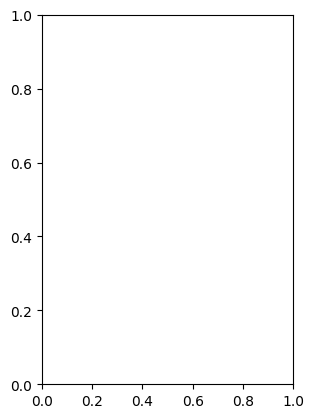

In [5]:
import geopandas as gpd

geo = gpd.read_file('hexagones_today.geojson')
geo.plot(column = 'fire_prediction', vmin=0)

In [6]:
geo.columns

Index(['index', 'hex_id', 'index_right', 'code_insee', 'nom', 'nuts3',
       'wikipedia', 'surf_km2', 'distance', 'humidite', 'temperature',
       'precipitations', 'neige', 'vitesse_vent', 'direction_vent', 'dc',
       'dmc', 'ffmc', 'isi', 'bui', 'fwi', 'daily_severity_rating',
       'landcover', 'cluster', 'frdayofweek', 'NDVI', 'NDMI', 'NDBI', 'NDSI',
       'NDWI', 'temp_coef', 'prec24h_coef', 'wspd_coef', 'rhum_coef',
       'temp_min', 'prec24h_min', 'wspd_min', 'rhum_min', 'temp_max',
       'prec24h_max', 'wspd_max', 'rhum_max', 'temp_mean', 'prec24h_mean',
       'wspd_mean', 'rhum_mean', 'population', 'elevation', 'osmnx',
       'bankHolidays', 'bankHolidaysEve', 'holidays', 'holidaysEve',
       'holidaysLastDay', 'departement_encoding',
       'fire_prediction_summer_model', 'geometry'],
      dtype='object')